<a href="https://colab.research.google.com/github/creation2/GAN_epilepsy/blob/master/shan_Runge_kutta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from pylab import mpl
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'NSimSun,Times New Roman'

In [2]:
def S(v):
  e0=2.5#s^(-1)
  r=0.56#(mv)^(-1)
  v0=6#mv
  return (2*e0)/(1.0+np.exp(r*(v0-v)))

## 改变A值

In [3]:
import numpy as np
from scipy import signal
from scipy.signal import find_peaks


def JR(A=3.25,B=22):
  dt=0.004
  time=8

  a=100
  b=50
  C=135
  C1=C
  C2=0.8*C
  C3=0.25*C
  C4=0.25*C
#高斯白噪声的产生
  p=np.zeros((1,int(time/dt)))
  u=90
  sigma=30
  for t in range(0,int(time/dt)-1):
    p[0][t+1]=u+sigma*np.random.randn()
  xxs=np.zeros((1,int(time/dt)))
  x=np.random.rand(1,6)
  xm=np.zeros((6,1))
  for t in range(1,int(time/dt)-1):
    xm=x
    k11=dt*(xm[0][3])
    k41=dt*(A*a*S(xm[0][1]-xm[0][2])-2*a*xm[0][3]-a**2*xm[0][0])
    k21=dt*xm[0][4]
    k51=dt*(A*a*(p[0][t]+C2*S(C1*xm[0][0]))-2*a*xm[0][4]-a**2*xm[0][1])
    k31=dt*xm[0][5]
    k61=dt*(B*b*C4*S(C3*xm[0][0])-2*b*xm[0][5]-b**2*xm[0][2])

    k12=dt*(xm[0][3]+k41/2)
    k42=dt*(A*a*S((xm[0][1]+k21/2)-(xm[0][2]+k31/2))-2*a*(xm[0][3]+k41/2)-a**2*(xm[0][0]+k11/2))
    k22=dt*(xm[0][4]+k51/2)
    k52=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k11/2)))-2*a*(xm[0][4]+k51/2)-a**2*(xm[0][1]+k21/2))
    k32=dt*(xm[0][5]+k61/2)
    k62=dt*(B*b*C4*S(C3*(xm[0][0]+k11/2))-2*b*(xm[0][5]+k61/2)-b**2*(xm[0][2]+k31/2))

    k13=dt*(xm[0][3]+k42/2)
    k43=dt*(A*a*S((xm[0][1]+k22/2)-(xm[0][2]+k32/2))-2*a*(xm[0][3]+k42/2)-a**2*(xm[0][0]+k12/2))
    k23=dt*(xm[0][4]+k52/2)
    k53=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k12/2)))-2*a*(xm[0][4]+k52/2)-a**2*(xm[0][1]+k22/2))
    k33=dt*(xm[0][5]+k62/2)
    k63=dt*(B*b*C4*S(C3*(xm[0][0]+k12/2))-2*b*(xm[0][5]+k62/2)-b**2*(xm[0][2]+k32/2))

    k14=dt*(xm[0][3]+k43)
    k44=dt*(A*a*S((xm[0][1]+k23)-(xm[0][2]+k33))-2*a*(xm[0][3]+k43)-a**2*(xm[0][0]+k13))
    k24=dt*(xm[0][4]+k53)
    k54=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k13)))-2*a*(xm[0][4]+k53)-a**2*(xm[0][1]+k23))
    k34=dt*(xm[0][5]+k63)
    k64=dt*(B*b*C4*S(C3*(xm[0][0]+k13))-2*b*(xm[0][5]+k63)-b**2*(xm[0][2]+k33))

    x[0][0]=xm[0][0]+(k11+2*k12+2*k13+k14)/6
    x[0][3]=xm[0][3]+(k41+2*k42+2*k43+k44)/6
    x[0][1]=xm[0][1]+(k21+2*k22+2*k23+k24)/6
    x[0][4]=xm[0][4]+(k51+2*k52+2*k53+k54)/6
    x[0][2]=xm[0][2]+(k31+2*k32+2*k33+k34)/6
    x[0][5]=xm[0][5]+(k61+2*k62+2*k63+k64)/6

    xxs[0][t]=xm[0][1]-xm[0][2]
  return xxs

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


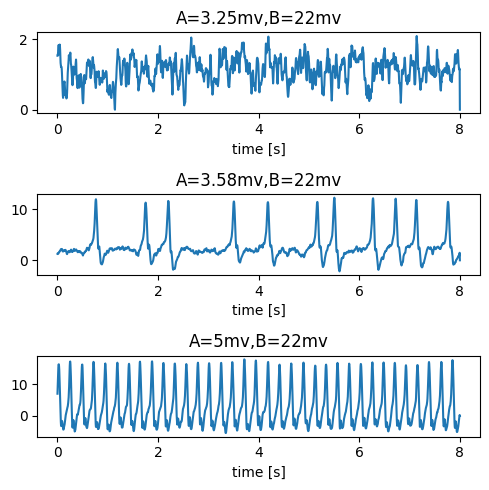

In [4]:
import matplotlib.pyplot as plt

if __name__=='__main__':
  #np.random.seed(100)
  As=[3.25,3.58,5]
  SEEG=[]
  for A in As:
    xxs=JR(A,B=22)
    SEEG.append(xxs[0])
       
  fig = plt.figure(figsize=(5,5),dpi=100)
  plt.subplot(311)
  t=np.linspace(0,8,len(SEEG[0][200:]))
  plt.plot(t,SEEG[0][200:])
            # ax.set_xticks([])
  plt.title("A=3.25mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  #plt.ylim(-5,10)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(312)
  plt.plot(t,SEEG[1][200:])
            # ax.set_xticks([])
  plt.title("A=3.58mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  #plt.ylim(-5,10)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(313)
  plt.plot(t,SEEG[2][200:])
            # ax.set_xticks([])
  plt.title("A=5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  #plt.ylim(-5,10)
  plt.xlabel('time [s]')
  plt.tight_layout()
  

  plt.show()

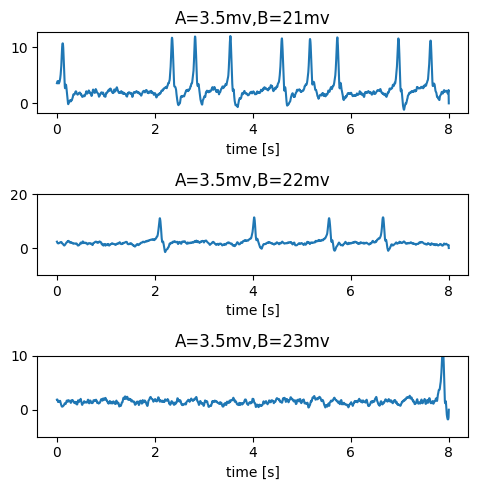

In [5]:
if __name__=='__main__':
  EEGs=[]
  Bs=[21,22,23]
  for B in Bs:
    xxs=JR(B=B,A=3.5)
    EEGs.append(xxs[0])
  
  fig = plt.figure(figsize=(5,5),dpi=100)
  plt.subplot(311)
  t=np.linspace(0,8,len(EEGs[0][200:]))
  plt.plot(t,EEGs[0][200:])
            # ax.set_xticks([])
  plt.title("A=3.5mv,B=21mv")
  plt.xticks(np.arange(0,10,2))
  #plt.ylim(-5,10)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(312)
  plt.plot(t, EEGs[1][200:])
            # ax.set_xticks([])
  plt.title("A=3.5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-10,20)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(313)
  plt.plot(t, EEGs[2][200:])
            # ax.set_xticks([])
  plt.title("A=3.5mv,B=23mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-5,10)
  plt.xlabel('time [s]')
  plt.tight_layout()
  

  plt.show()

In [6]:
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
def JR(A=3.25,B=22):
  dt=0.005
  time=10

  a=100
  b=50
  C=135
  C1=C
  C2=0.8*C
  C3=0.25*C
  C4=0.25*C
#高斯白噪声的产生
  p=np.zeros((1,int(time/dt)))
  u=90
  sigma=30
  for t in range(0,int(time/dt)-1):
    p[0][t+1]=u+sigma*np.random.randn()
  xxs=np.zeros((1,int(time/dt)))
  x=np.random.rand(1,6)
  xm=np.zeros((6,1))
  for t in range(1,int(time/dt)-1):
    xm=x
    k11=dt*(xm[0][3])
    k41=dt*(A*a*S(xm[0][1]-xm[0][2])-2*a*xm[0][3]-a**2*xm[0][0])
    k21=dt*xm[0][4]
    k51=dt*(A*a*(p[0][t]+C2*S(C1*xm[0][0]))-2*a*xm[0][4]-a**2*xm[0][1])
    k31=dt*xm[0][5]
    k61=dt*(B*b*C4*S(C3*xm[0][0])-2*b*xm[0][5]-b**2*xm[0][2])

    k12=dt*(xm[0][3]+k41/2)
    k42=dt*(A*a*S((xm[0][1]+k21/2)-(xm[0][2]+k31/2))-2*a*(xm[0][3]+k41/2)-a**2*(xm[0][0]+k11/2))
    k22=dt*(xm[0][4]+k51/2)
    k52=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k11/2)))-2*a*(xm[0][4]+k51/2)-a**2*(xm[0][1]+k21/2))
    k32=dt*(xm[0][5]+k61/2)
    k62=dt*(B*b*C4*S(C3*(xm[0][0]+k11/2))-2*b*(xm[0][5]+k61/2)-b**2*(xm[0][2]+k31/2))

    k13=dt*(xm[0][3]+k42/2)
    k43=dt*(A*a*S((xm[0][1]+k22/2)-(xm[0][2]+k32/2))-2*a*(xm[0][3]+k42/2)-a**2*(xm[0][0]+k12/2))
    k23=dt*(xm[0][4]+k52/2)
    k53=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k12/2)))-2*a*(xm[0][4]+k52/2)-a**2*(xm[0][1]+k22/2))
    k33=dt*(xm[0][5]+k62/2)
    k63=dt*(B*b*C4*S(C3*(xm[0][0]+k12/2))-2*b*(xm[0][5]+k62/2)-b**2*(xm[0][2]+k32/2))

    k14=dt*(xm[0][3]+k43)
    k44=dt*(A*a*S((xm[0][1]+k23)-(xm[0][2]+k33))-2*a*(xm[0][3]+k43)-a**2*(xm[0][0]+k13))
    k24=dt*(xm[0][4]+k53)
    k54=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k13)))-2*a*(xm[0][4]+k53)-a**2*(xm[0][1]+k23))
    k34=dt*(xm[0][5]+k63)
    k64=dt*(B*b*C4*S(C3*(xm[0][0]+k13))-2*b*(xm[0][5]+k63)-b**2*(xm[0][2]+k33))

    x[0][0]=xm[0][0]+(k11+2*k12+2*k13+k14)/6
    x[0][3]=xm[0][3]+(k41+2*k42+2*k43+k44)/6
    x[0][1]=xm[0][1]+(k21+2*k22+2*k23+k24)/6
    x[0][4]=xm[0][4]+(k51+2*k52+2*k53+k54)/6
    x[0][2]=xm[0][2]+(k31+2*k32+2*k33+k34)/6
    x[0][5]=xm[0][5]+(k61+2*k62+2*k63+k64)/6

    xxs[0][t]=xm[0][1]-xm[0][2]

  t=np.arange(0,10,0.005) 
  N=len(t)
  fs=200
  zz=xxs[0]
  z_=zz-np.mean(zz)
  window1=signal.get_window('hann',len(z_))
  nfft1=len(z_)
  f,psd=signal.welch(z_,fs=fs,window=window1,nfft=nfft1,average='mean')
  # print(f)
  # #print(f[15])
  # print('.........')
  # print(psd)
  # print('............')
  mpsd=np.max(psd)
  # print(mpsd)
  # print('**************')
  # print(np.argmax(psd))
  # print('####################')
  p1=f[np.argmax(psd)]
  p2=mpsd

  xcut=xxs[0][101:]
  p3=max(xcut)
  """
  peaksmax=find_peaks(xcut)
  #print(peaksmax[0])
  peakmax=[]
  for m in range(len(peaksmax[0])):
    peakmax.append(xcut[peaksmax[0][m]])
  peaksmax=np.sort(peakmax)
  pmax=peaksmax[-1]
  p3=pmax 
  """
  # peaksmax=find_peaks(xcut)
  # peaksmax=np.sort(xcut[peaksmax])
  # pmax=peaksmax[0][-1]
  # p3=pmax
  # p3=xcut[pmax] 

  return p1,p2,p3
     

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


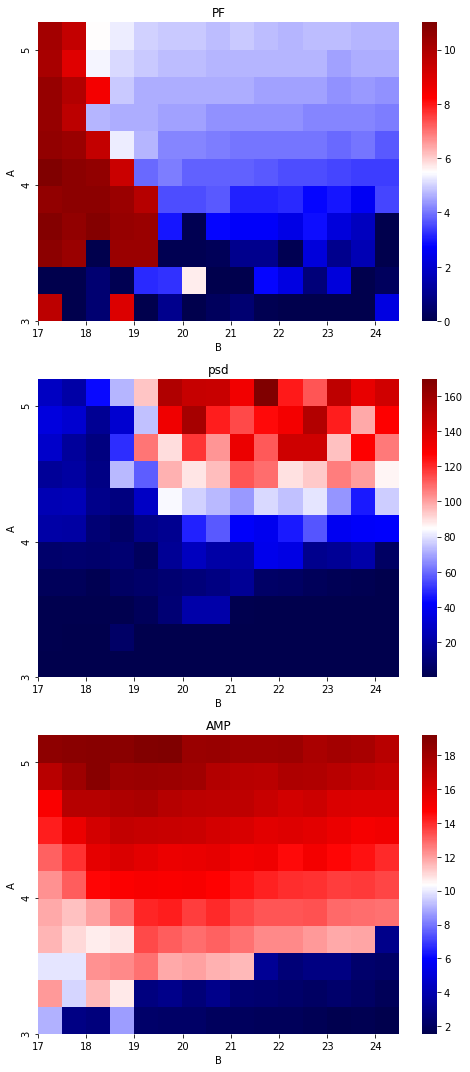

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
if __name__=="__main__":
    #np.random.seed(1000)
    
    len1=len(np.arange(3,5.2,0.2))
    len2=len(np.arange(17,24.5,0.5))

    A=np.arange(3,5.2,0.2)
    B=np.arange(17,24.5,0.5)

    ff=np.zeros((len2,len1))#f[i]
    mpsd1=np.zeros((len2,len1))#mpsd
    pmax1=np.zeros((len2,len1))

    for i in range(0,len2):
        for j in range(0,len1):
            
            p1,p2,p3=JR(A[j],B[i])
            ff[i][j]=p1
            mpsd1[i][j]=p2
            pmax1[i][j]=p3
    #fig,axes = plt.subplots(3,1,figsize=(13,12),dpi=100)
    #plt.subplot(311)
    frame1=pd.DataFrame(ff.T,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)])
    frame2=pd.DataFrame(mpsd1.T,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)]) 
    frame3=pd.DataFrame(pmax1.T,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)]) 
#     frame2=pd.DataFrame(mpsd1,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)]) 
#     frame3=pd.DataFrame(pmax1,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)]) 
    # print(frame1)
    # print(np.shape(frame1))
    # print(frame2)
    # print(np.shape(frame2))
    # print(frame3)
    # print(np.shape(frame3))
   
    f,(ax1,ax2,ax3)=plt.subplots(figsize=(7,15),nrows=3)
    #设置坐标轴刻度
    xnum_ticks=8
    xticks=np.linspace(0,len(frame1.columns)-1,xnum_ticks,dtype=np.int)
    xticklabels=[int(frame1.columns[i]) for i in xticks]
    ynum_ticks=3
    yticks=np.linspace(0,len(frame1.index)-1,ynum_ticks,dtype=np.int)
    yticklabels=[int(frame1.index[i]) for i in yticks]
    

    sns.heatmap(frame1,ax=ax1,cbar =True,cmap='seismic',xticklabels=xticklabels,yticklabels=yticklabels)
    ax1.set_title('PF')
    ax1.set_xlabel('B')
    ax1.set_ylabel('A')
    ax1.set_xticks(xticks)
    ax1.set_yticks(yticks)
    ax1.invert_yaxis()
    #plt.imshow(ff.T)
    plt.tight_layout()
    
    #plt.subplot(312)
    #plt.imshow(mpsd1.T)
    sns.heatmap(frame2,ax=ax2,cmap='seismic',xticklabels=xticklabels,yticklabels=yticklabels)
    ax2.set_title('psd')
    ax2.set_xlabel('B')
    ax2.set_ylabel('A')
    ax2.set_xticks(xticks)
    ax2.set_yticks(yticks)
    ax2.invert_yaxis()
    plt.tight_layout()
    
    #plt.subplot(313)
    #plt.imshow(pmax1.T)
    sns.heatmap(frame3,ax=ax3,cmap='seismic',xticklabels=xticklabels,yticklabels=yticklabels)
    ax3.set_title('AMP')
    ax3.set_xlabel('B')
    ax3.set_ylabel('A')
    ax3.set_xticks(xticks)
    ax3.set_yticks(yticks)
    ax3.invert_yaxis()
    plt.tight_layout()
    
    plt.show()
 

  
    

- 计算样本熵

In [10]:
!pip install sampen

In [20]:
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
from sampen import sampen2
def JR(A=3.25,B=22):
  dt=0.005
  time=10

  a=100
  b=50
  C=135
  C1=C
  C2=0.8*C
  C3=0.25*C
  C4=0.25*C
#高斯白噪声的产生
  p=np.zeros((1,int(time/dt)))
  u=90
  sigma=30
  for t in range(0,int(time/dt)-1):
    p[0][t+1]=u+sigma*np.random.randn()
  xxs=np.zeros((1,int(time/dt)))
  x=np.random.rand(1,6)
  xm=np.zeros((6,1))
  for t in range(1,int(time/dt)-1):
    xm=x
    k11=dt*(xm[0][3])
    k41=dt*(A*a*S(xm[0][1]-xm[0][2])-2*a*xm[0][3]-a**2*xm[0][0])
    k21=dt*xm[0][4]
    k51=dt*(A*a*(p[0][t]+C2*S(C1*xm[0][0]))-2*a*xm[0][4]-a**2*xm[0][1])
    k31=dt*xm[0][5]
    k61=dt*(B*b*C4*S(C3*xm[0][0])-2*b*xm[0][5]-b**2*xm[0][2])

    k12=dt*(xm[0][3]+k41/2)
    k42=dt*(A*a*S((xm[0][1]+k21/2)-(xm[0][2]+k31/2))-2*a*(xm[0][3]+k41/2)-a**2*(xm[0][0]+k11/2))
    k22=dt*(xm[0][4]+k51/2)
    k52=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k11/2)))-2*a*(xm[0][4]+k51/2)-a**2*(xm[0][1]+k21/2))
    k32=dt*(xm[0][5]+k61/2)
    k62=dt*(B*b*C4*S(C3*(xm[0][0]+k11/2))-2*b*(xm[0][5]+k61/2)-b**2*(xm[0][2]+k31/2))

    k13=dt*(xm[0][3]+k42/2)
    k43=dt*(A*a*S((xm[0][1]+k22/2)-(xm[0][2]+k32/2))-2*a*(xm[0][3]+k42/2)-a**2*(xm[0][0]+k12/2))
    k23=dt*(xm[0][4]+k52/2)
    k53=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k12/2)))-2*a*(xm[0][4]+k52/2)-a**2*(xm[0][1]+k22/2))
    k33=dt*(xm[0][5]+k62/2)
    k63=dt*(B*b*C4*S(C3*(xm[0][0]+k12/2))-2*b*(xm[0][5]+k62/2)-b**2*(xm[0][2]+k32/2))

    k14=dt*(xm[0][3]+k43)
    k44=dt*(A*a*S((xm[0][1]+k23)-(xm[0][2]+k33))-2*a*(xm[0][3]+k43)-a**2*(xm[0][0]+k13))
    k24=dt*(xm[0][4]+k53)
    k54=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k13)))-2*a*(xm[0][4]+k53)-a**2*(xm[0][1]+k23))
    k34=dt*(xm[0][5]+k63)
    k64=dt*(B*b*C4*S(C3*(xm[0][0]+k13))-2*b*(xm[0][5]+k63)-b**2*(xm[0][2]+k33))

    x[0][0]=xm[0][0]+(k11+2*k12+2*k13+k14)/6
    x[0][3]=xm[0][3]+(k41+2*k42+2*k43+k44)/6
    x[0][1]=xm[0][1]+(k21+2*k22+2*k23+k24)/6
    x[0][4]=xm[0][4]+(k51+2*k52+2*k53+k54)/6
    x[0][2]=xm[0][2]+(k31+2*k32+2*k33+k34)/6
    x[0][5]=xm[0][5]+(k61+2*k62+2*k63+k64)/6

    xxs[0][t]=xm[0][1]-xm[0][2]
  sample_data_series=sampen2(xxs[0])
  sample_data_series=max(sample_data_series)

  return sample_data_series

In [22]:
a=JR(A=3.25,B=22)
print(a[1])

0.4554809055497081


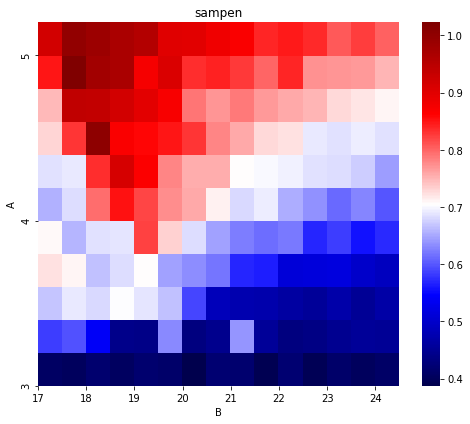

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
if __name__=="__main__":
  #np.random.seed(1000)
  
  len1=len(np.arange(3,5.2,0.2))
  len2=len(np.arange(17,24.5,0.5))

  A=np.arange(3,5.2,0.2)
  B=np.arange(17,24.5,0.5)

  series_data=np.zeros((len2,len1))#f[i]

  for i in range(0,len2):
      for j in range(0,len1): 
        sampen_of_series=JR(A[j],B[i])
        series_data[i][j]=sampen_of_series[1]
  #fig,axes = plt.subplots(3,1,figsize=(13,12),dpi=100)
  #plt.subplot(311)
  frame1=pd.DataFrame(series_data.T,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)])
  f,ax1=plt.subplots(figsize=(7,6),nrows=1)
    #设置坐标轴刻度
  xnum_ticks=8
  xticks=np.linspace(0,len(frame1.columns)-1,xnum_ticks,dtype=np.int)
  xticklabels=[int(frame1.columns[i]) for i in xticks]
  ynum_ticks=3
  yticks=np.linspace(0,len(frame1.index)-1,ynum_ticks,dtype=np.int)
  yticklabels=[int(frame1.index[i]) for i in yticks]
  
  sns.heatmap(frame1,ax=ax1,cbar =True,cmap='seismic',xticklabels=xticklabels,yticklabels=yticklabels)
  ax1.set_title('sampen')
  ax1.set_xlabel('B')
  ax1.set_ylabel('A')
  ax1.set_xticks(xticks)
  ax1.set_yticks(yticks)
  ax1.invert_yaxis()
  #plt.imshow(ff.T)
  plt.tight_layout()
  plt.show()



#### 改变外部输入P
- 固定p的标准差为30，改变其均值

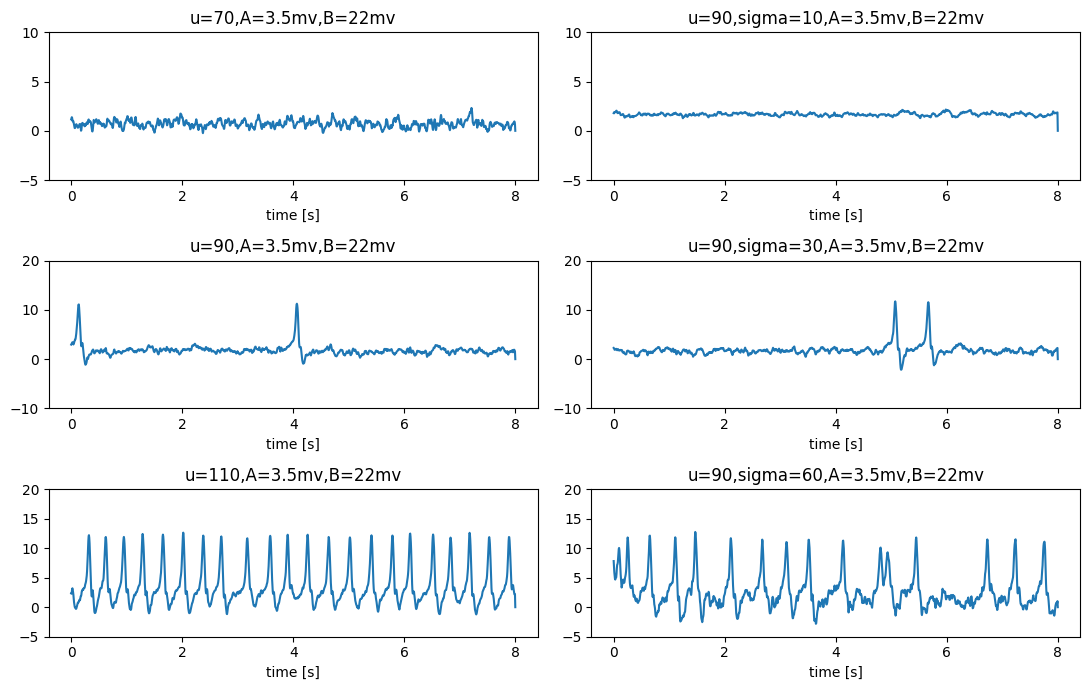

In [ ]:
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

def JR(u=90,sigma=30,A=3.5,B=22):

  dt=0.005
  time=8

  a=100
  b=50
  C=135
  C1=C
  C2=0.8*C
  C3=0.25*C
  C4=0.25*C
#高斯白噪声的产生
  p=np.zeros((1,int(time/dt)))
  for t in range(0,int(time/dt)-1):
      p[0][t+1]=u+sigma*np.random.randn()
  xxs=np.zeros((1,int(time/dt)))
  x=np.random.rand(1,6)
  xm=np.zeros((6,1))
  for t in range(1,int(time/dt)-1):
      xm=x
      k11=dt*(xm[0][3])
      k41=dt*(A*a*S(xm[0][1]-xm[0][2])-2*a*xm[0][3]-a**2*xm[0][0])
      k21=dt*xm[0][4]
      k51=dt*(A*a*(p[0][t]+C2*S(C1*xm[0][0]))-2*a*xm[0][4]-a**2*xm[0][1])
      k31=dt*xm[0][5]
      k61=dt*(B*b*C4*S(C3*xm[0][0])-2*b*xm[0][5]-b**2*xm[0][2])

      k12=dt*(xm[0][3]+k41/2)
      k42=dt*(A*a*S((xm[0][1]+k21/2)-(xm[0][2]+k31/2))-2*a*(xm[0][3]+k41/2)-a**2*(xm[0][0]+k11/2))
      k22=dt*(xm[0][4]+k51/2)
      k52=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k11/2)))-2*a*(xm[0][4]+k51/2)-a**2*(xm[0][1]+k21/2))
      k32=dt*(xm[0][5]+k61/2)
      k62=dt*(B*b*C4*S(C3*(xm[0][0]+k11/2))-2*b*(xm[0][5]+k61/2)-b**2*(xm[0][2]+k31/2))

      k13=dt*(xm[0][3]+k42/2)
      k43=dt*(A*a*S((xm[0][1]+k22/2)-(xm[0][2]+k32/2))-2*a*(xm[0][3]+k42/2)-a**2*(xm[0][0]+k12/2))
      k23=dt*(xm[0][4]+k52/2)
      k53=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k12/2)))-2*a*(xm[0][4]+k52/2)-a**2*(xm[0][1]+k22/2))
      k33=dt*(xm[0][5]+k62/2)
      k63=dt*(B*b*C4*S(C3*(xm[0][0]+k12/2))-2*b*(xm[0][5]+k62/2)-b**2*(xm[0][2]+k32/2))

      k14=dt*(xm[0][3]+k43)
      k44=dt*(A*a*S((xm[0][1]+k23)-(xm[0][2]+k33))-2*a*(xm[0][3]+k43)-a**2*(xm[0][0]+k13))
      k24=dt*(xm[0][4]+k53)
      k54=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k13)))-2*a*(xm[0][4]+k53)-a**2*(xm[0][1]+k23))
      k34=dt*(xm[0][5]+k63)
      k64=dt*(B*b*C4*S(C3*(xm[0][0]+k13))-2*b*(xm[0][5]+k63)-b**2*(xm[0][2]+k33))

      x[0][0]=xm[0][0]+(k11+2*k12+2*k13+k14)/6
      x[0][3]=xm[0][3]+(k41+2*k42+2*k43+k44)/6
      x[0][1]=xm[0][1]+(k21+2*k22+2*k23+k24)/6
      x[0][4]=xm[0][4]+(k51+2*k52+2*k53+k54)/6
      x[0][2]=xm[0][2]+(k31+2*k32+2*k33+k34)/6
      x[0][5]=xm[0][5]+(k61+2*k62+2*k63+k64)/6

      xxs[0][t]=xm[0][1]-xm[0][2]
  return xxs
if __name__=='__main__':
  EEGs=[]
  sEEGs=[]
  us=[70,90,110]
  sigmas=[10,30,60]
  for u in us:
    xxs=JR(u=u,sigma=30,B=22,A=3.5)
    EEGs.append(xxs[0])
  for sigma in sigmas:
    xxs=JR(u=90,sigma=sigma,B=22,A=3.5)
    sEEGs.append(xxs[0])
  
  fig = plt.figure(figsize=(11,7),dpi=100)
  plt.subplot(321)
  t=np.linspace(0,8,len(EEGs[0][200:]))
  plt.plot(t,EEGs[0][200:])
            # ax.set_xticks([])
  plt.title("u=70,A=3.5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-5,10)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(323)
  plt.plot(t, EEGs[1][200:])
            # ax.set_xticks([])
  plt.title("u=90,A=3.5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-10,20)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(325)
  plt.plot(t, EEGs[2][200:])
            # ax.set_xticks([])
  plt.title("u=110,A=3.5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-5,20)
  plt.xlabel('time [s]')
  plt.tight_layout()
  #随着sigma的改变
  plt.subplot(322)
  t=np.linspace(0,8,len(sEEGs[0][200:]))
  plt.plot(t,sEEGs[0][200:])
            # ax.set_xticks([])
  plt.title("u=90,sigma=10,A=3.5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-5,10)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(324)
  plt.plot(t, sEEGs[1][200:])
            # ax.set_xticks([])
  plt.title("u=90,sigma=30,A=3.5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-10,20)
  plt.xlabel('time [s]')
  plt.tight_layout()

  plt.subplot(326)
  plt.plot(t, sEEGs[2][200:])
            # ax.set_xticks([])
  plt.title("u=90,sigma=60,A=3.5mv,B=22mv")
  plt.xticks(np.arange(0,10,2))
  plt.ylim(-5,20)
  plt.xlabel('time [s]')
  plt.tight_layout()
  plt.show()

### 均值与方差一起改变时

In [ ]:
import numpy as np
from scipy import signal
from scipy.signal import find_peaks
def JR(u=90,sigma=30,A=3.25,B=22):
  dt=0.005
  time=10

  a=100
  b=50
  C=135
  C1=C
  C2=0.8*C
  C3=0.25*C
  C4=0.25*C
#高斯白噪声的产生
  p=np.zeros((1,int(time/dt)))
  #u=90
  #sigma=30
  for t in range(0,int(time/dt)-1):
    p[0][t+1]=u+sigma*np.random.randn()
  xxs=np.zeros((1,int(time/dt)))
  x=np.random.rand(1,6)
  xm=np.zeros((6,1))
  for t in range(1,int(time/dt)-1):
    xm=x
    k11=dt*(xm[0][3])
    k41=dt*(A*a*S(xm[0][1]-xm[0][2])-2*a*xm[0][3]-a**2*xm[0][0])
    k21=dt*xm[0][4]
    k51=dt*(A*a*(p[0][t]+C2*S(C1*xm[0][0]))-2*a*xm[0][4]-a**2*xm[0][1])
    k31=dt*xm[0][5]
    k61=dt*(B*b*C4*S(C3*xm[0][0])-2*b*xm[0][5]-b**2*xm[0][2])

    k12=dt*(xm[0][3]+k41/2)
    k42=dt*(A*a*S((xm[0][1]+k21/2)-(xm[0][2]+k31/2))-2*a*(xm[0][3]+k41/2)-a**2*(xm[0][0]+k11/2))
    k22=dt*(xm[0][4]+k51/2)
    k52=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k11/2)))-2*a*(xm[0][4]+k51/2)-a**2*(xm[0][1]+k21/2))
    k32=dt*(xm[0][5]+k61/2)
    k62=dt*(B*b*C4*S(C3*(xm[0][0]+k11/2))-2*b*(xm[0][5]+k61/2)-b**2*(xm[0][2]+k31/2))

    k13=dt*(xm[0][3]+k42/2)
    k43=dt*(A*a*S((xm[0][1]+k22/2)-(xm[0][2]+k32/2))-2*a*(xm[0][3]+k42/2)-a**2*(xm[0][0]+k12/2))
    k23=dt*(xm[0][4]+k52/2)
    k53=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k12/2)))-2*a*(xm[0][4]+k52/2)-a**2*(xm[0][1]+k22/2))
    k33=dt*(xm[0][5]+k62/2)
    k63=dt*(B*b*C4*S(C3*(xm[0][0]+k12/2))-2*b*(xm[0][5]+k62/2)-b**2*(xm[0][2]+k32/2))

    k14=dt*(xm[0][3]+k43)
    k44=dt*(A*a*S((xm[0][1]+k23)-(xm[0][2]+k33))-2*a*(xm[0][3]+k43)-a**2*(xm[0][0]+k13))
    k24=dt*(xm[0][4]+k53)
    k54=dt*(A*a*(p[0][t]+C2*S(C1*(xm[0][0]+k13)))-2*a*(xm[0][4]+k53)-a**2*(xm[0][1]+k23))
    k34=dt*(xm[0][5]+k63)
    k64=dt*(B*b*C4*S(C3*(xm[0][0]+k13))-2*b*(xm[0][5]+k63)-b**2*(xm[0][2]+k33))

    x[0][0]=xm[0][0]+(k11+2*k12+2*k13+k14)/6
    x[0][3]=xm[0][3]+(k41+2*k42+2*k43+k44)/6
    x[0][1]=xm[0][1]+(k21+2*k22+2*k23+k24)/6
    x[0][4]=xm[0][4]+(k51+2*k52+2*k53+k54)/6
    x[0][2]=xm[0][2]+(k31+2*k32+2*k33+k34)/6
    x[0][5]=xm[0][5]+(k61+2*k62+2*k63+k64)/6

    xxs[0][t]=xm[0][1]-xm[0][2]

  t=np.arange(0,10,0.005) 
  N=len(t)
  fs=200
  zz=xxs[0]
  z_=zz-np.mean(zz)
  window1=signal.get_window('hann',len(z_))
  nfft1=len(z_)
  f,psd=signal.welch(z_,fs=fs,window=window1,nfft=nfft1,average='mean')
  mpsd=np.max(psd)
  p1=f[np.argmax(psd)]
  p2=mpsd

  xcut=xxs[0][101:]
  p3=max(xcut)
 

  return p1,p2,p3

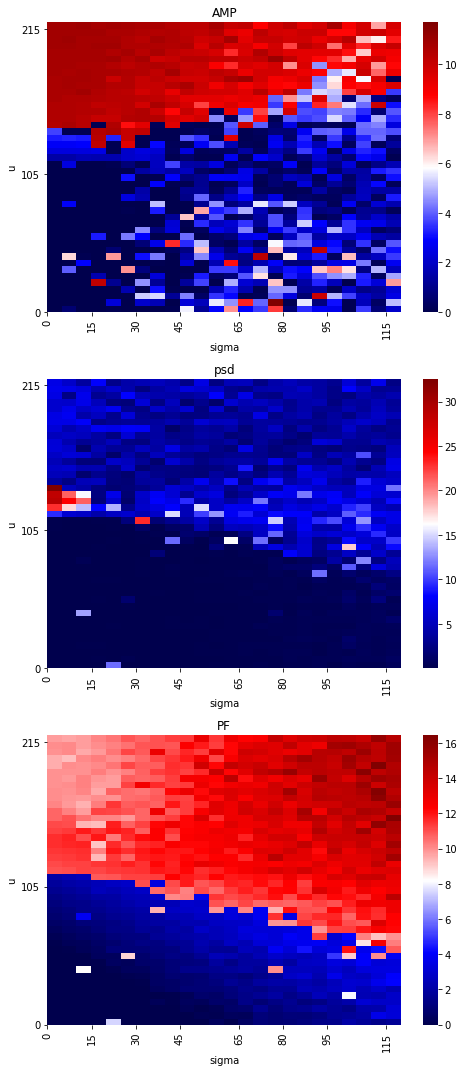

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
if __name__=="__main__":
  len1=len(np.arange(0,220,5))
  len2=len(np.arange(0,120,5))
    

  sigma=np.arange(0,120,5)
  u=np.arange(0,220,5)

  ff=np.zeros((len2,len1))#f[i]
  mpsd1=np.zeros((len2,len1))#mpsd
  pmax1=np.zeros((len2,len1))

  for i in range(0,len2):
    for j in range(0,len1):
      p1,p2,p3=JR(u[j],sigma[i],A=3.25,B=22)
      ff[i][j]=p1
      mpsd1[i][j]=p2
      pmax1[i][j]=p3
  #fig,axes = plt.subplots(3,1,figsize=(13,12),dpi=100)
  #plt.subplot(311)
  frame1=pd.DataFrame(ff.T,columns=[sigma[j] for j in range(0,len2)],index=[u[i]  for i in range(0,len1)])
  frame2=pd.DataFrame(mpsd1.T,columns=[sigma[j] for j in range(0,len2)],index=[u[i]  for i in range(0,len1)]) 
  frame3=pd.DataFrame(pmax1.T,columns=[sigma[j] for j in range(0,len2)],index=[u[i]  for i in range(0,len1)]) 
#     frame2=pd.DataFrame(mpsd1,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)]) 
#     frame3=pd.DataFrame(pmax1,columns=[B[j] for j in range(0,len2)],index=[A[i]  for i in range(0,len1)]) 
  # print(frame1)
  # print(np.shape(frame1))
  # print(frame2)
  # print(np.shape(frame2))
  # print(frame3)
  # print(np.shape(frame3))
  
  f,(ax1,ax2,ax3)=plt.subplots(figsize=(7,15),nrows=3)
  #设置坐标轴刻度
  xnum_ticks=8
  xticks=np.linspace(0,len(frame1.columns)-1,xnum_ticks,dtype=np.int)
  xticklabels=[int(frame1.columns[i]) for i in xticks]
  ynum_ticks=3
  yticks=np.linspace(0,len(frame1.index)-1,ynum_ticks,dtype=np.int)
  yticklabels=[int(frame1.index[i]) for i in yticks]
  

  sns.heatmap(frame1,ax=ax1,cbar=True,cmap='seismic',xticklabels=xticklabels,yticklabels=yticklabels)
  ax1.set_title('AMP')
  ax1.set_xlabel('sigma')
  ax1.set_ylabel('u')
  ax1.set_xticks(xticks)
  ax1.set_yticks(yticks)
  ax1.invert_yaxis()
  #plt.imshow(ff.T)
  plt.tight_layout()
  
  #plt.subplot(312)
  #plt.imshow(mpsd1.T)
  sns.heatmap(frame2,ax=ax2,cmap='seismic',xticklabels=xticklabels,yticklabels=yticklabels)
  ax2.set_title('psd')
  ax2.set_xlabel('sigma')
  ax2.set_ylabel('u')
  ax2.set_xticks(xticks)
  ax2.set_yticks(yticks)
  ax2.invert_yaxis()
  plt.tight_layout()
  
  #plt.subplot(313)
  #plt.imshow(pmax1.T)
  sns.heatmap(frame3,ax=ax3,cmap='seismic',xticklabels=xticklabels,yticklabels=yticklabels)
  ax3.set_title('PF')
  ax3.set_xlabel('sigma')
  ax3.set_ylabel('u')
  ax3.set_xticks(xticks)
  ax3.set_yticks(yticks)
  ax3.invert_yaxis()
  plt.tight_layout()
  
  plt.show()